In [1]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

In [2]:
#create dataframe
df= pd.read_csv('DataSet_Ads.csv')
print(df.head())

   Age  Gender    Income  Location Ad Type Ad Topic   Ad Placement  Clicks  \
0   61    Male  35717.43     Urban  Banner   Travel   Social Media       3   
1   41    Male  47453.25     Rural   Video   Travel  Search Engine       5   
2   49  Female  68126.35     Rural    Text     Food   Social Media       4   
3   68  Female  64585.73  Suburban    Text   Health        Website       6   
4   63    Male  21109.40     Urban  Native  Fashion  Search Engine       5   

                   Click Time  Conversion Rate     CTR  
0  2024-01-18 20:45:56.898459           0.0981  0.0737  
1  2023-04-24 20:45:56.898459           0.0937  0.0592  
2  2024-02-24 20:45:56.898459           0.1912  0.0563  
3  2023-12-13 20:45:56.898459           0.1122  0.0232  
4  2023-07-02 20:45:56.898459           0.1426  0.0539  


In [3]:
#convert Click Time column to datetime 
df['Click Time'] = pd.to_datetime(df['Click Time'])

In [4]:
# Check for missing values
df.isnull().sum()

Age                0
Gender             0
Income             0
Location           0
Ad Type            0
Ad Topic           0
Ad Placement       0
Clicks             0
Click Time         0
Conversion Rate    0
CTR                0
dtype: int64

In [5]:
#summary statistics
df.describe()

,Age,Income,Clicks,Click Time,Conversion Rate,CTR
count,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000
mean,34.235200,50080.040922,5.030600,2023-10-21 23:56:01.713264128,0.202246,0.050425
min,-21.000000,-38932.640000,0.000000,2023-04-22 20:45:56.899351,0.001000,0.000000
25%,24.000000,36892.040000,3.000000,2023-07-23 20:45:56.907425024,0.109500,0.037100
50%,34.000000,50122.520000,5.000000,2023-10-22 20:45:56.911939584,0.180650,0.050300
75%,44.000000,63271.342500,6.000000,2024-01-19 20:45:56.915853824,0.275100,0.063700
max,92.000000,126635.800000,17.000000,2024-04-19 20:45:56.927349,0.731700,0.127200
std,14.790752,19935.832667,2.258046,NaN,0.121094,0.019821


In [6]:
df.dtypes

Age                         int64
Gender                     object
Income                    float64
Location                   object
Ad Type                    object
Ad Topic                   object
Ad Placement               object
Clicks                      int64
Click Time         datetime64[ns]
Conversion Rate           float64
CTR                       float64
dtype: object

In [7]:
#Drop values of those under 18 years old 
df.drop(df[df['Age'] < 18].index, inplace = True)

#Drop values of those with negative income
df.drop(df[df['Income'] < 0].index, inplace = True)

df.describe()

,Age,Income,Clicks,Click Time,Conversion Rate,CTR
count,8630.000000,8630.000000,8630.000000,8630,8630.000000,8630.000000
mean,37.828389,50372.730817,5.031518,2023-10-21 15:31:05.047648,0.202096,0.050526
min,18.000000,165.210000,0.000000,2023-04-22 20:45:56.899351,0.001000,0.000000
25%,29.000000,36999.882500,3.000000,2023-07-23 20:45:56.908156160,0.108900,0.037100
50%,37.000000,50206.800000,5.000000,2023-10-22 20:45:56.905392128,0.180500,0.050400
75%,46.000000,63238.587500,6.000000,2024-01-18 20:45:56.912936960,0.275275,0.063900
max,92.000000,126635.800000,17.000000,2024-04-19 20:45:56.927349,0.685200,0.127200
std,12.123562,19510.294854,2.263995,NaN,0.121278,0.019905


In [8]:
#Find income duplicates
duplicates = df.duplicated('Income', keep=False)

#sort duplicates
duplicated_incomes = df[duplicates].sort_values('Income')

#Check other columns
print(duplicated_incomes[['Age','Location','Gender','Ad Topic','Income']])

#No real duplicates

      Age  Location  Gender    Ad Topic    Income
2002   35  Suburban    Male      Health  22381.52
4273   35     Rural    Male      Travel  22381.52
3226   51     Rural  Female  Technology  33442.76
3980   48     Rural    Male      Travel  33442.76
745    43  Suburban  Female      Health  54329.15
1517   33     Rural   Other        Food  54329.15
849    35  Suburban    Male      Health  68381.54
6541   31  Suburban    Male     Fashion  68381.54


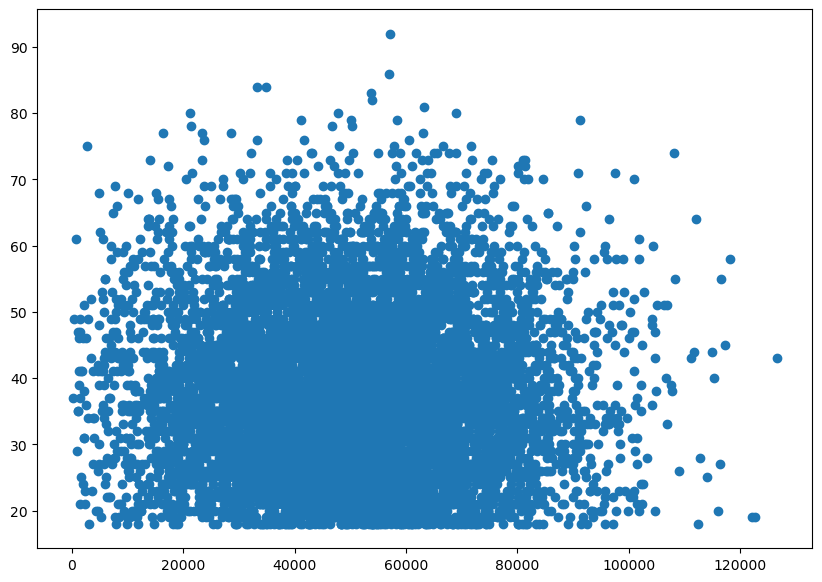

In [9]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.scatter(df['Income'], df['Age'])

# show plot
plt.show()

#No significant outliers

In [10]:
#Save Data to CSV 

df.to_csv('Dataset_Ads_Clean.csv')